#NUMBER THEORY ASSIGNMENT SOLUTION 
1. MEAN, MEDIAN,MODE
2. VARIANCE
3. STANDARD DEVIATION
4. COVARIANCE
5. CORRELATION
6. KURTOSIS
7. OUTLIER
8. HISTOGRAM

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#MEAN=  Sum of all number in samples/total length of sample
# Median= median if n is odd: meadian=((n+1)/2)th obserbation of sorted list
#if n=even then meadian=  ((n/2)th+((n/2)+1)th)/2 observation in sorted list
#mode= frequnecy of number

In [ ]:
def mean(*args):
  val_sum = sum(args)
  return val_sum/len(args)

##median if n is odd:
#meadian=((n+1)/2)th obserbation of sorted list
#if n=even then meadian=  ((n/2)th+((n/2)+1)th)/2 observation in sorted list

def median(*args):
  args=np.sort(args)
  print(args)
  if (len(args)%2==0):
    i=round((len(args)/2)+1)
    j = i - 1
    return (args[i-1] + args[j-1])/2
  else:
    k = round(len(args)/2)
    return args[k-1]


## mode  is count frequency of number in list

def mode(*args):
    # Count how many times values show up in
    # the list and put it in a dictionary
    dict_vals = {i: args.count(i) for i in args}
    # Create a list of keys that have the maximum
    # number of occurrence in the list
    max_list = [k for k, v in dict_vals.items() if v == max(dict_vals.values())]
    return max_list



#VARIANCE: The average of the squared differences from the Mean
#IF CALCULATING THE VARIANCE FOR POLULATION THEN WE DEVIDE BY N
#AND FOR SAMPLE WE USE N-1 FOR DIVISION

In [ ]:
def variance(*args):
    mean_val = mean(*args)
    numerator=0
    for i in args:
        numerator +=(i-mean_val)**2
    denominator = len(args) 
    return numerator/denominator

# Standard Deviation: It Is Squaroot of Variance

In [ ]:
def standard_deviation(*args):
    return (variance(*args))**0.5
 

#COVARIANCE

In [ ]:
def covariance(*args):
    # Use a list comprehension to get all values
    # stored in the 1st & 2nd list
    list_1 = [i[0] for i in args]
    list_2 = [i[1] for i in args]
    # Pass those lists to get their means
    list_1_mean = mean(*list_1[0])
    list_2_mean = mean(*list_2[0])
    numerator = 0
 
    # We must have the same number of elements
    # in both lists
    if len(list_1[0]) == len(list_2[0]):
        for i in range(len(list_1[0])):
            # FInd xi - x mean * yi - y mean
            numerator += (list_1[0][i] - list_1_mean) * (list_2[0][i] - list_2_mean)
        denominator = len(list_1[0]) - 1
        return numerator / denominator
    else:
        print("Error : You must have the same number of values in both lists")
 

#CORRELATION

In [ ]:
def correlation_coefficient(*args):
    list_1 = [i[0] for i in args]
    list_2 = [i[1] for i in args]
    # Pass those lists to get their standard deviations
    list_1_sd = standard_deviation(*list_1[0])
    list_2_sd = standard_deviation(*list_2[0])
    #print("L1 SD :",list_1_sd)
    #print("L2 SD :",list_2_sd)
    denominator = list_1_sd * list_2_sd
    # Get the covariance
    numerator = covariance(*args)
    return numerator / denominator

#**KURTOSIS**

In [ ]:
def kurtosis(*args):
  mean_val=mean(*args)
  numerator=0
  for i in args:
    numerator += (((i-mean_val)/(standard_deviation(*args)))**4)
  absolute_kurtosis=numerator/len(args)
  relative_kurtosis=absolute_kurtosis-3
  return relative_kurtosis


In [ ]:
x=[10,12,15,18,24,27]
y=[38,42,55,60,65,70]
correlation_coefficient((x,y))

L1 SD : 6.128258770283411
L2 SD : 11.604596790352806


1.1502338734186495

In [ ]:
x=[24,22,14,21,26,19,20,13,24,26,24,26,23,20,22,16,24,26,18,15]
y=(kurtosis(24,22,14,21,26,19,20,13,24,26,24,26,23,20,22,16,24,26,18,15))

print(kurtosis(24,22,14,21,26,19,20,13,24,26,24,26,23,20,22,16,24,26,18,15))
#print(variance(x))

-0.8450853386936581


#OUTLIER: WE CAN REMOVE THE OUTLIER BY USING TWO WAYS 
1. BY STANDARD DEVIATIOn method
2. IQR Interquartile Rage method

In [ ]:
#by using standard deviation
def std_outlier(*args):
  args=np.sort(args)
  mean_val=mean(*args)
  std_val=standard_deviation(*args)
  print(std_val,mean_val)
  #print(sum(args))
  upper=round(mean_val+(3*std_val))
  lower=round(mean_val-(3*std_val))
  outliers = [x for x in args if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
# remove outliers
  outliers_removed = [x for x in args if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))
  print("Without outlier: ",outliers_removed)
  return outliers


In [ ]:
#by interquartile range
def IQR_outlier(*args):
  q1,q3=np.percentile(args,[25,75])
  IQR=q3-q1
  upper=q3+(1.5*IQR)
  lower=q1-(1.5*IQR)
  outliers = [x for x in args if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
# remove outliers
  outliers_removed = [x for x in args if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))
  print("Without outlier: ",outliers_removed)
  return outliers


In [ ]:
print(IQR_outlier(100,2,3,4,5,6,7,8,9,10,11,12,1,103,500))

Identified outliers: 3
Non-outlier observations: 12
Without outlier:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 1]
[100, 103, 500]


In [ ]:
print(std_outlier(100,2,3,4,5,6,7,8,9,10,11,12))

25.88154104118738 14.75
Identified outliers: 1
Non-outlier observations: 11
Without outlier:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[100]


In [ ]:
# let do exercise with data i have craeted small data scv file age and height

In [ ]:

df=pd.read_csv("example_data.csv")

In [ ]:
print(df)

    Age  Height
0     8      35
1    10      38
2    11      40
3    13      44
4    14      48
5    15      55
6    18      60
7    20      65
8    22      68
9    25      72
10   28      70
11   30      69
12   35      69
13   40      65
14   44      64
15   48      63
16   55      60
17   60      55
18   65      52
19   25     160


In [ ]:
def histogram(*args):
  age=[i[0] for i in args]

  n_bins=21
  height = [i[1] for i in args]

  plt.hist(height,bins=21)
  plt.title("Histogram of height")
  plt.xlabel("Height---->")
  plt.ylabel("Value--->")

  #plt.show()
  


In [ ]:
x=df['Age']
y=df['Height']
x=np.array(x)
y=np.array(y)

#**Calling all the function by passing arguments**

MEAN-------------->        29.3
Mode-------------->        [25]
[ 8 10 11 13 14 15 18 20 22 25 25 28 30 35 40 44 48 55 60 65]
MEDIAN------------>        25.0
VARIANCE---------->        288.10999999999996
STANDARD DEVIATION-->      16.973803345155144
COVARIANCE-------->        54.021052631578925
CORRELATION------->        0.12764811335675025
KURTOSIS---------->        -0.7211344135540934
Identified outliers: 1
Non-outlier observations: 19
Without outlier:  [35, 38, 40, 44, 48, 55, 60, 65, 68, 72, 70, 69, 69, 65, 64, 63, 60, 55, 52]
Outlier value--------- >    [160]
Histogram of data>    None


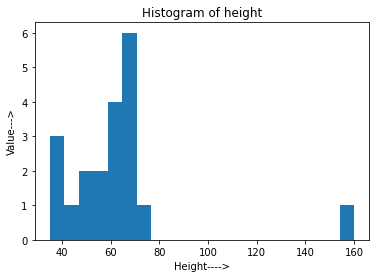

In [ ]:
print("MEAN-------------->       ",mean(*x))
print("Mode-------------->       ",mode(*x))
print("MEDIAN------------>       ",median(*x))
print("VARIANCE---------->       ",variance(*x))
print("STANDARD DEVIATION-->     ",standard_deviation(*x))
print("COVARIANCE-------->       ",covariance((x,y)))
print("CORRELATION------->       ",correlation_coefficient((x,y)))
print("KURTOSIS---------->       ",kurtosis(*x))
print("Outlier value--------- >   ",IQR_outlier(*y))
print("Histogram of data>   ",histogram((x,y)))







#**All THE FUNCTION I DEVELOPRD HERE YOU CAN CHECK BY JUST PASSING ANY DATA FRME OR BY ANY VALUE TO FUNCTION FOR CHECK THE WORKING OF ALL PIPELINES**